In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

In [2]:
df=pd.read_csv('C:/Users/Kandarp/Desktop/Test-core -Dataset.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,some college,standard,completed,77,81,78
1,female,group B,some high school,free/reduced,completed,37,49,46
2,male,group A,some college,free/reduced,completed,32,37,41
3,male,group B,bachelor's degree,standard,completed,88,87,80
4,female,group C,high school,standard,completed,92,92,93
5,female,group C,some high school,free/reduced,completed,63,75,80
6,female,group C,some college,free/reduced,none,49,50,45
7,male,group C,associate's degree,free/reduced,none,81,76,76
8,female,group C,high school,free/reduced,completed,83,86,89
9,female,group B,some college,standard,completed,89,98,100


In [3]:
df['overall']=df.sum(axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall
0,male,group C,some college,standard,completed,77,81,78,236
1,female,group B,some high school,free/reduced,completed,37,49,46,132
2,male,group A,some college,free/reduced,completed,32,37,41,110
3,male,group B,bachelor's degree,standard,completed,88,87,80,255
4,female,group C,high school,standard,completed,92,92,93,277


In [4]:
df.isnull().count()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
overall                        1000
dtype: int64

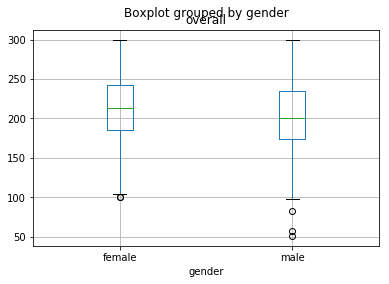

In [8]:
df.boxplot(column='overall', by='gender')
plt.show()

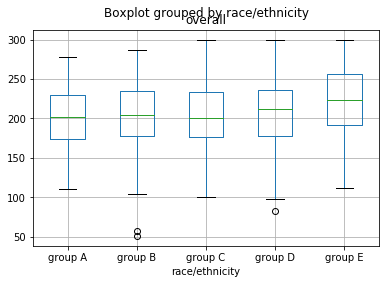

In [9]:
df.boxplot(column='overall', by='race/ethnicity')
plt.show()

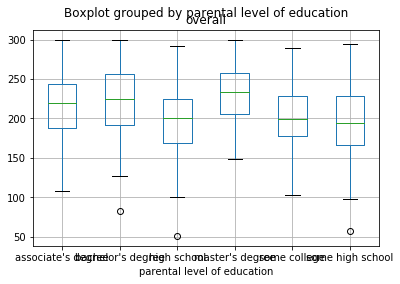

In [10]:
df.boxplot(column='overall', by='parental level of education')
plt.show()

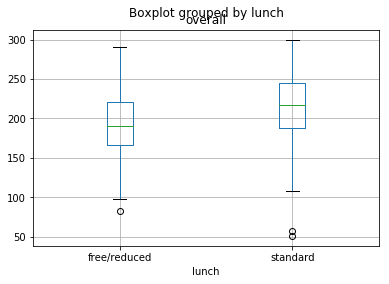

In [11]:
df.boxplot(column='overall', by='lunch')
plt.show()

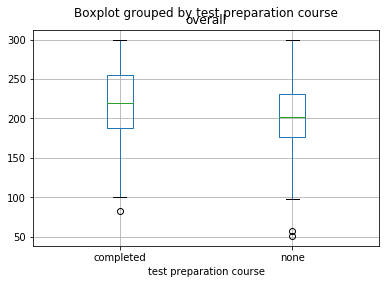

In [12]:
df.boxplot(column='overall', by='test preparation course')
plt.show()

In [5]:
for col in df:
    b, c = np.unique(df[col], return_inverse=True) 
    df[col] = c

In [6]:
X = pd.DataFrame(np.c_[df['parental level of education'],df['test preparation course'],df['lunch'],df['race/ethnicity']])
Y= df['overall']

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(800, 4)
(200, 4)
(800,)
(200,)


In [8]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 41.20693410765531
R2 score is 0.16109205784184621


In [17]:
x = df.iloc[:, [1, 2, 3,4]].values

In [18]:
from sklearn.cluster import KMeans
#from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(x)   
y_kmeans = kmeans.fit_predict(x)
centroids = kmeans.cluster_centers_
print(centroids)

[[2.18761726 0.9793621  0.65853659 0.67542214]
 [2.22698073 4.25267666 0.64668094 0.65524625]]


In [19]:
y = pd.DataFrame(df.overall)
y.columns = ['overall']

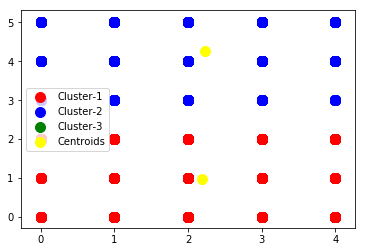

In [20]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster-1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster-2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster-3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

[[2.20750552 4.29139073 0.64238411 0.65783664]
 [1.4202454  1.02760736 0.67484663 0.65644172]
 [3.36199095 1.0361991  0.64253394 0.69683258]]


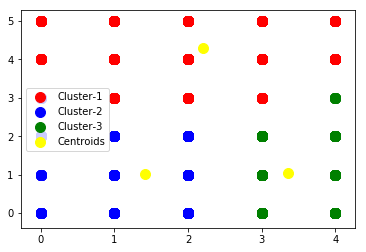

In [21]:
kmeans = KMeans(n_clusters=3).fit(x)   
y_kmeans = kmeans.fit_predict(x)
centroids = kmeans.cluster_centers_
print(centroids) 
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster-1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster-2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster-3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()